# librosa for pre-processing the audio signal

>When it comes to training neural network for classification, data augmentation such as random cropping  or resize for images are necessary to prevent overfitting. Fortunately, Librosa supports many impressive features from loading audio data to stretching signals. For Pytorch users, Librosa makes it easy to preprocess our data, and we can concentrate on building the model for more difficult tasks like classification and separation!!! OK, Let's Start

> reference: https://medium.com/@keur.plkar/audio-data-augmentation-in-python-a91600613e47


In [53]:
import numpy as np
import librosa
import librosa.display as display
import matplotlib.pyplot as plt

## define for visualization

In [54]:
def visual_spec(wave:np.array, sr:int) -> None:
    """
    function for plotting spectrogram with wave graph
    """
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    ax[0].title.set_text("original wave")
    ax[0].plot(np.linspace(0, 1, len(wave)), wave)
    ax[1].title.set_text("spectrogram")
    ax[1].specgram(wave, Fs=2)
    plt.show()
    plt.close()

## see the wave and its spectrogram

D:\Anaconda\envs\torch\lib\site-packages\matplotlib\axes\_axes.py:7592: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


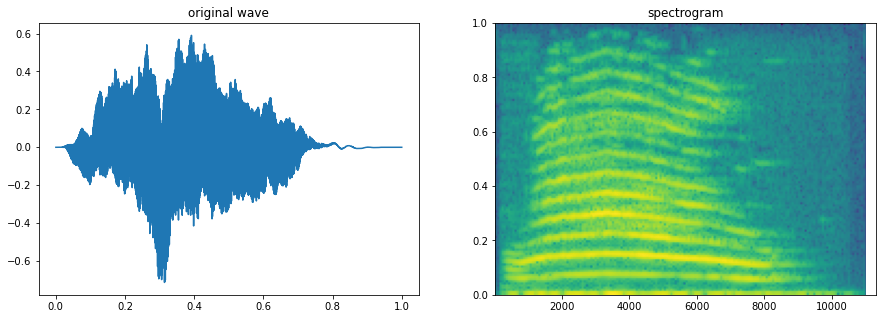

In [55]:
file_path = "cat.wav"
wav, sr = librosa.load(file_path, sr=None)  # wave should be 1D array
visual_spec(wave=wav, sr=sr)

## Add a little Noise to wave

In [56]:
def Noise_Add(wave:np.array, s:float=0.01) -> np.array:
    """
    add some noise to original wave
    """
    wave_noise = wave + s * np.random.normal(0, 1, len(wave))
    return wave_noise
    

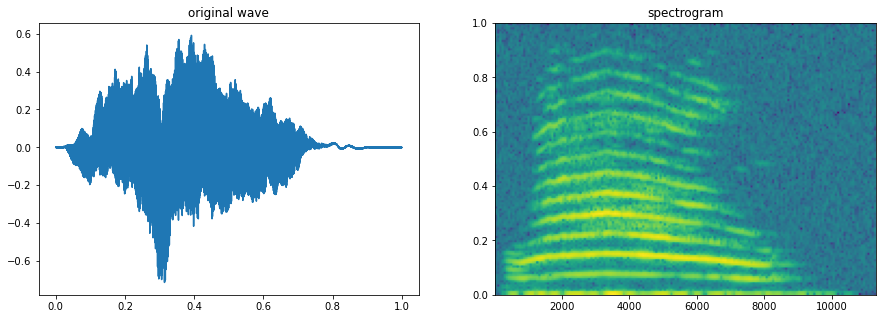

In [57]:
wav_noise = Noise_Add(wav, 0.001)
visual_spec(wave=wav_noise, sr=sr)

## Shifting to wave by 0.1 sample rate

In [58]:
def Shifting(wave:np.array, sr:int, s:float=0.1) -> np.array:
    """
    shifting the wave by the factor of 0.1*sr
    """
    wave_roll = np.roll(wave, int(sr*s))
    return wave_roll

D:\Anaconda\envs\torch\lib\site-packages\matplotlib\axes\_axes.py:7592: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


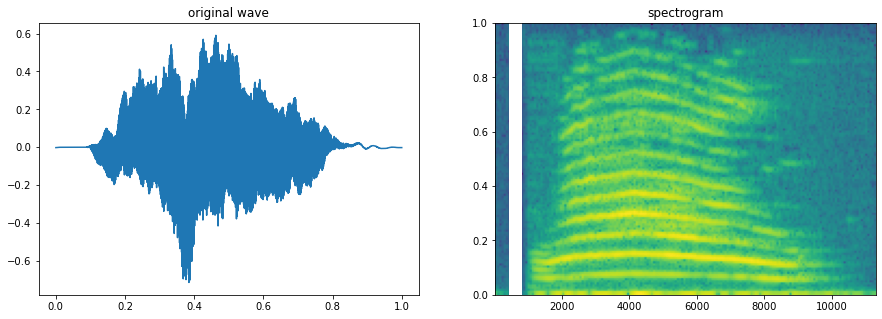

In [59]:
wav_roll = Shifting(wav, sr, s=0.1)
visual_spec(wav_roll, sr=sr)

## Stretching wave by the factor (change the speed of a wave while fixing the frequency)

In [60]:
def Stretching(wave:np.array, s:float=0.4) -> np.array:
    wave_stch = librosa.effects.time_stretch(wave, rate=s)
    return wave_stch

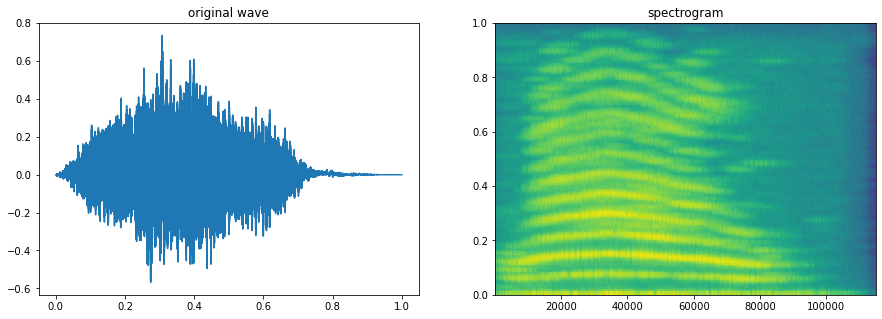

In [61]:
wav_stret = Stretching(wav, s=0.1)
visual_spec(wav_stret, sr=sr)

## Pitch Shifting (changing frequency of wave when fixing the speed)

In [62]:
def Pitch_Shift(wave:np.array, sr:int, n:int=5) -> np.array:
    wav_pitch_sf = librosa.effects.pitch_shift(wave,sr,n_steps=n)
    return wav_pitch_sf

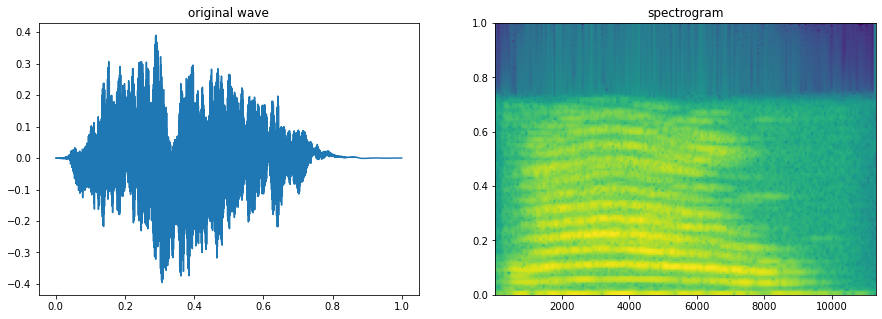

In [63]:
wav_stret = Pitch_Shift(wav, sr=sr, n=-5)
visual_spec(wav_stret, sr=sr)

## MFCC

In [64]:
def visual_spectrogam(spec:np.array) -> None:
    plt.figure(figsize=(10, 4))
    display.specshow(librosa.power_to_db(spec, ref=np.max), fmax=10000, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel spectrogram')
    plt.show()
    plt.close()

In [65]:
def MelSpectrogram(wave:np.array, sr:int, nFFT:int=512, hop:int=256, p:float=2.0) -> np.array:
    """
    input:
        wave: original waveform
        sr: sample rate
        nFFT: number of samples in a window to calculate the FFT
        hopSize: stride of the window
        p: energy=1.0 / power=2.0
    Output:
        mel spectrogram
    """
    spectrogram = librosa.feature.melspectrogram(y=wave, sr=sr, n_fft=nFFT, hop_length=hop, power=p)
    return spectrogram

In [66]:
MelSpec = MelSpectrogram(wave=wav, sr=sr, nFFT=512, hop=256, p=2.0)

In [74]:
MelSpec.shape

(128, 89)

In [75]:
def MFCC(wave:np.array=None, sr:int=16000, Mel:np.array=None, n:int=20) -> np.array:
    """
    wave: original waveform
    sr: sample rate
    Mel: MelSpectrogram
    n: feature dimension ex:20

    """
    feature = librosa.feature.mfcc(y=wave, sr=sr, S=Mel, n_mfcc=n)
    return feature

In [94]:
feature = MFCC(wave=wav, sr=sr, Mel=MelSpec, n=13)

In [95]:
feature.shape

(13, 89)

> Finally!
> Convert the mfcc features into torchTensor, followed by feeding them into your neural network.